In [2]:
import pandas as pd
djia_data = pd.read_csv('HistoricalPrices.csv')
djia_data

,Date,Open,High,Low,Close
0,12/30/22,33121.61,33152.55,32847.82,33147.25
1,12/29/22,33021.43,33293.42,33020.35,33220.80
2,12/28/22,33264.76,33379.55,32869.15,32875.71
3,12/27/22,33224.23,33387.72,33069.58,33241.56
4,12/23/22,32961.06,33226.14,32814.02,33203.93
...,...,...,...,...,...
246,01/07/22,36249.59,36382.84,36111.53,36231.66
247,01/06/22,36409.05,36464.19,36200.68,36236.47
248,01/05/22,36722.60,36952.65,36400.39,36407.11
249,01/04/22,36636.00,36934.84,36636.00,36799.65


In [5]:
djia_data = djia_data.rename(columns = {' Open': 'Open' ,' High': 'High',
                                        ' Low': 'Low',
                                        ' Close': 'Close'})
djia_data

,Date,Open,High,Low,Close
0,12/30/22,33121.61,33152.55,32847.82,33147.25
1,12/29/22,33021.43,33293.42,33020.35,33220.80
2,12/28/22,33264.76,33379.55,32869.15,32875.71
3,12/27/22,33224.23,33387.72,33069.58,33241.56
4,12/23/22,32961.06,33226.14,32814.02,33203.93
...,...,...,...,...,...
246,01/07/22,36249.59,36382.84,36111.53,36231.66
247,01/06/22,36409.05,36464.19,36200.68,36236.47
248,01/05/22,36722.60,36952.65,36400.39,36407.11
249,01/04/22,36636.00,36934.84,36636.00,36799.65


In [11]:
djia_data['Date'] = pd.to_datetime(djia_data['Date'])
djia_data = djia_data.sort_values(by = 'Date')
djia_data

,Date,Open,High,Low,Close
250,2022-01-03,36321.59,36595.82,36246.45,36585.06
249,2022-01-04,36636.00,36934.84,36636.00,36799.65
248,2022-01-05,36722.60,36952.65,36400.39,36407.11
247,2022-01-06,36409.05,36464.19,36200.68,36236.47
246,2022-01-07,36249.59,36382.84,36111.53,36231.66
...,...,...,...,...,...
4,2022-12-23,32961.06,33226.14,32814.02,33203.93
3,2022-12-27,33224.23,33387.72,33069.58,33241.56
2,2022-12-28,33264.76,33379.55,32869.15,32875.71
1,2022-12-29,33021.43,33293.42,33020.35,33220.80


# MatplotLib Implementation

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

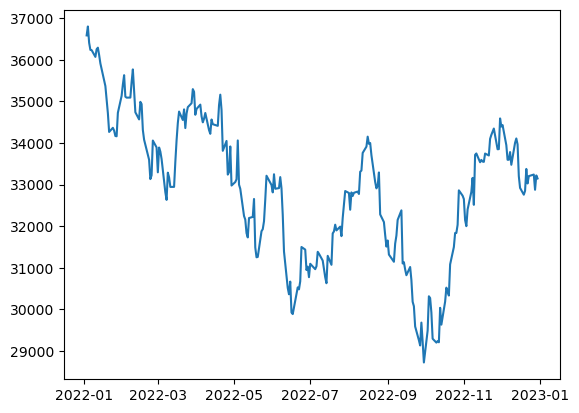

In [16]:

plt.plot(djia_data['Date'], djia_data['Close'])
plt.show()

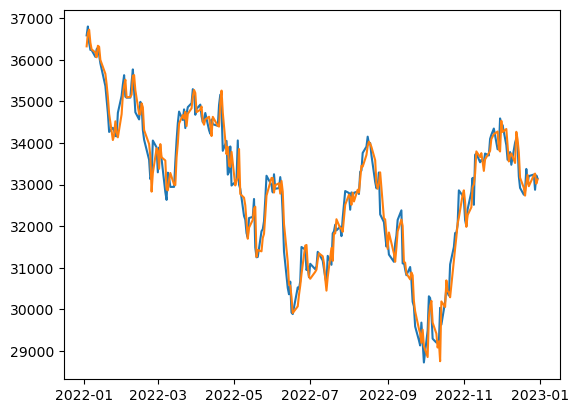

In [18]:
plt.plot(djia_data['Date'], djia_data['Close'])
plt.plot(djia_data['Date'], djia_data['Open'])

plt.show()

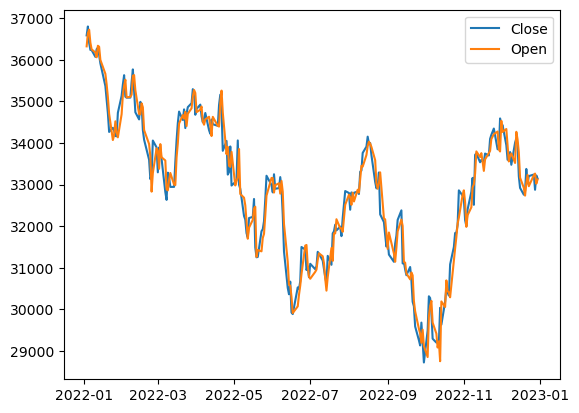

In [21]:
plt.plot(djia_data['Date'], djia_data['Close'], label= 'Close')
plt.plot(djia_data['Date'], djia_data['Open'] , label= 'Open')
plt.legend()
plt.show()

In [29]:
# Import the calendar package
from calendar import month_name

# Order by months by chronological order
djia_data['Month'] = pd.Categorical(djia_data['Date'].dt.month_name(), month_name[1:])

# Group metrics by monthly averages
djia_monthly_mean = djia_data \
    .groupby('Month') \
    .mean() \
    .reset_index()

djia_monthly_mean.head(6)

,Month,Date,Open,High,Low,Close
0,January,2022-01-16 04:48:00.000000000,35498.130500,35740.910500,35145.955000,35456.145000
1,February,2022-02-13 12:37:53.684210432,34687.516316,34906.204211,34362.243684,34648.480526
2,March,2022-03-16 00:00:00.000000000,34007.498261,34270.890870,33752.963478,34029.740435
3,April,2022-04-15 19:12:00.000000000,34392.094500,34640.367500,34078.481000,34314.990000
4,May,2022-05-15 06:51:25.714285824,32364.327143,32668.028095,31996.512857,32379.462857
5,June,2022-06-15 11:25:42.857142784,31526.033333,31755.637143,31188.788095,31446.712857


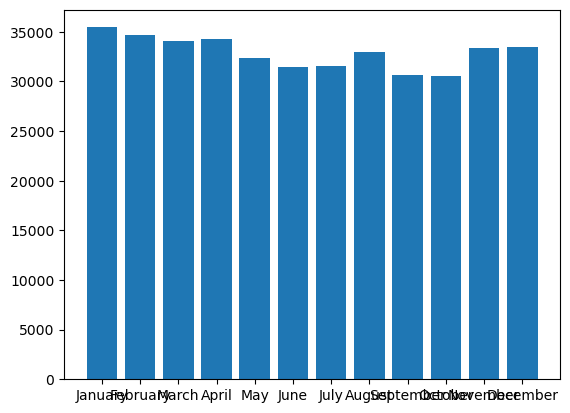

In [35]:
plt.bar(djia_monthly_mean['Month'],  djia_monthly_mean['Close'])
plt.show()

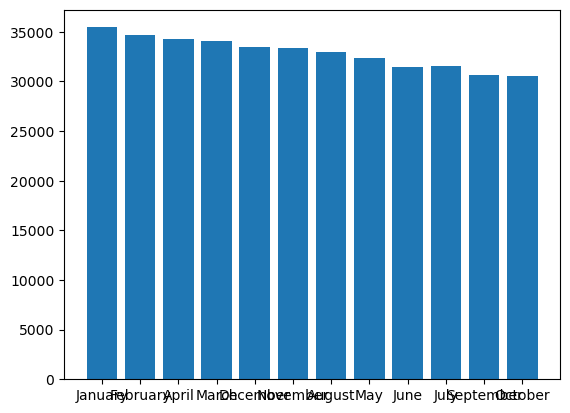

In [39]:
djia_monthly_mean_srtd = djia_monthly_mean.sort_values(by = 'Open', ascending = False)

plt.bar(djia_monthly_mean_srtd['Month'] , height = djia_monthly_mean_srtd['Close'])
plt.show()

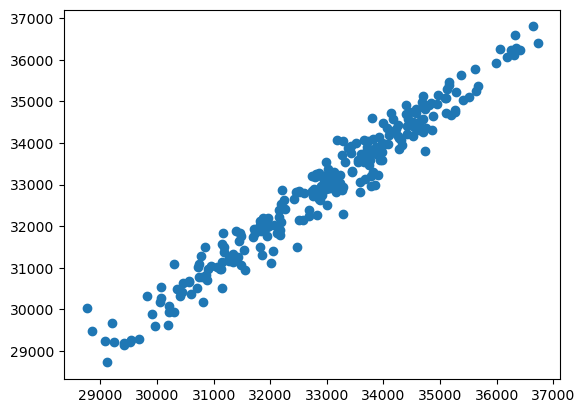

In [40]:
plt.scatter(djia_data['Open'], djia_data['Close'])
plt.show()

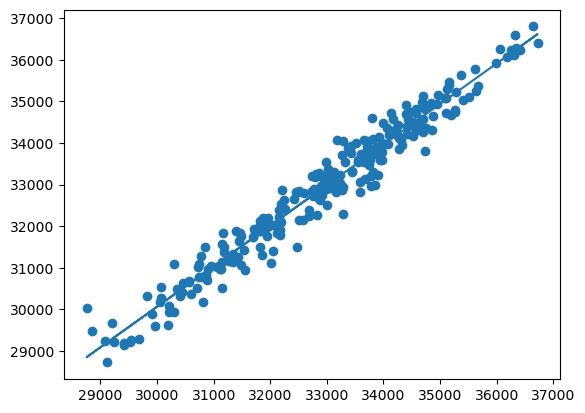

In [53]:
z = np.polyfit(djia_data['Open'], djia_data['Close'],1)
p = np.poly1d(z)

plt.scatter(djia_data['Open'], djia_data['Close'])
plt.plot(djia_data['Open'], p(djia_data['Open']))
plt.show()

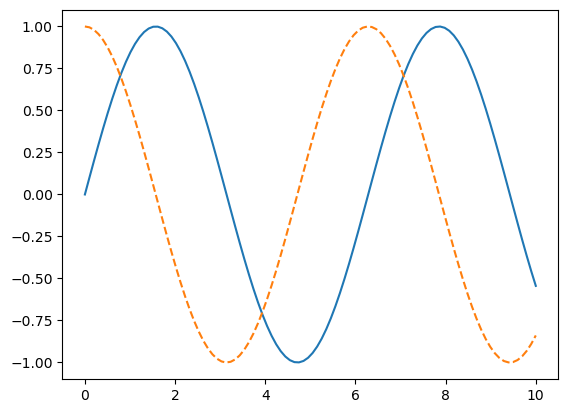

In [64]:
x1 = np.linspace(0,10,100)

fig = plt.figure()

plt.plot(x1, np.sin(x1), '-')
plt.plot(x1, np.cos(x1), '--')

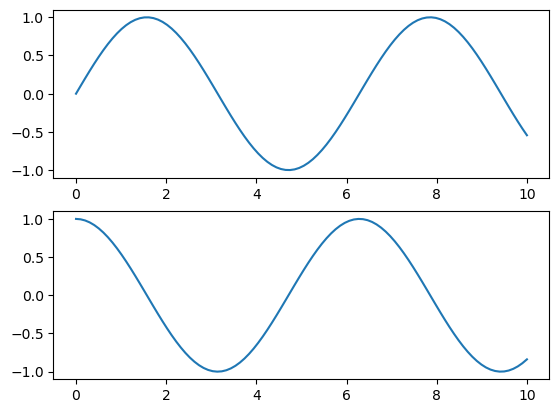

In [66]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(x1, np.sin(x1))

plt.subplot(2,1,2)
plt.plot(x1, np.cos(x1))

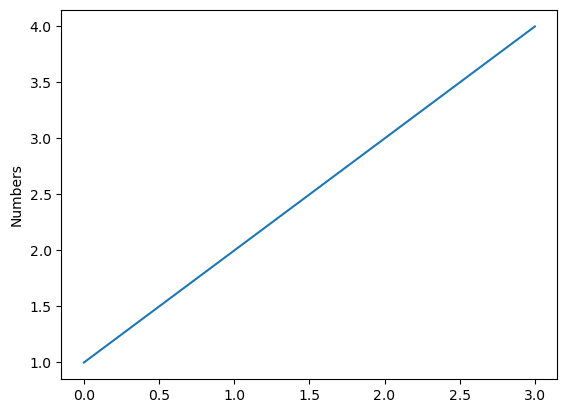

In [67]:
plt.plot([1,2,3,4])
plt.ylabel('Numbers')
plt.show()

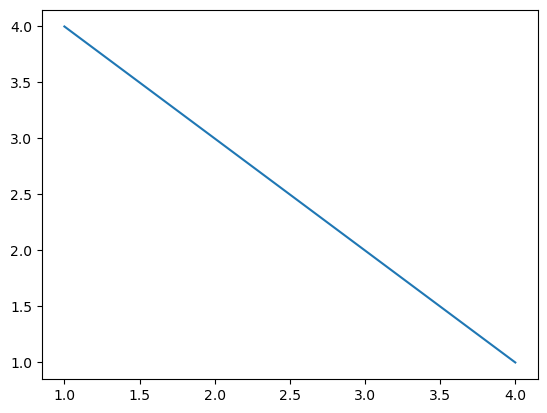

In [69]:
plt.plot([1,2,3,4],[4,3,2,1])
plt.show()

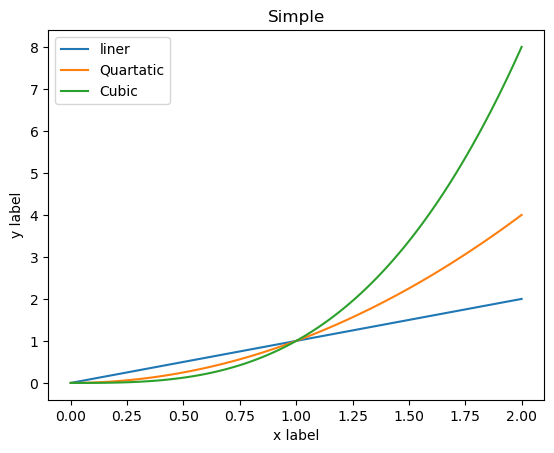

In [70]:
x = np.linspace(0 ,2 , 100)

plt.plot(x, x, label='liner')
plt.plot(x, x**2, label='Quartatic')
plt.plot(x, x**3, label='Cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple")

plt.legend()
plt.show()

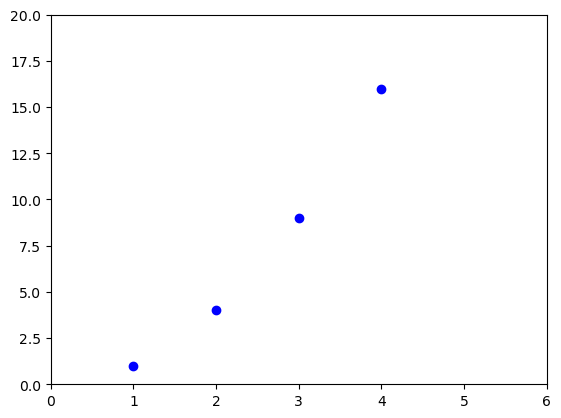

In [76]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'bo')
plt.axis([0, 6, 0, 20])
plt.show()

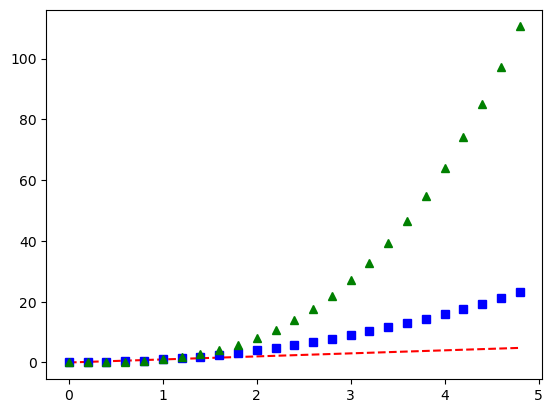

In [79]:
t = np.arange(0 , 5, 0.2)

plt.plot(t , t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
plt.show()

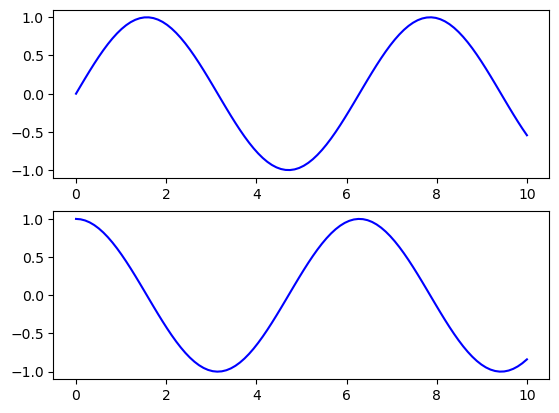

In [80]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)


# Call plot() method on the appropriate object
ax[0].plot(x1, np.sin(x1), 'b-')
ax[1].plot(x1, np.cos(x1), 'b-');

Text(0.5, 1.0, 'title')

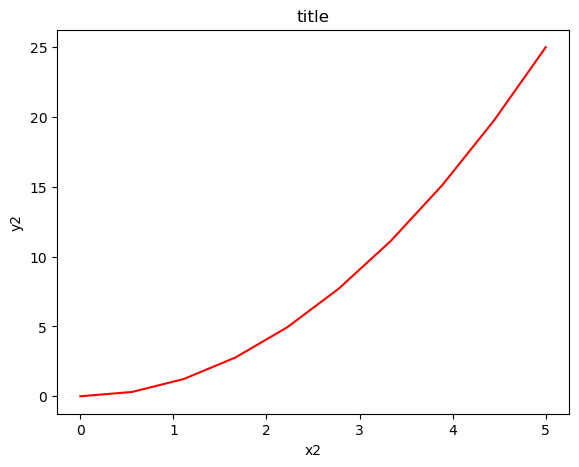

In [86]:
fig = plt.figure()

x2 = np.linspace(0, 5, 10)
y2 = x2 ** 2
x2, y2

axes = fig.add_axes([0.1 , 0.1, 0.8, 0.8])
axes.plot(x2, y2, 'r')
axes.set_xlabel('x2')
axes.set_ylabel('y2')
axes.set_title('title')

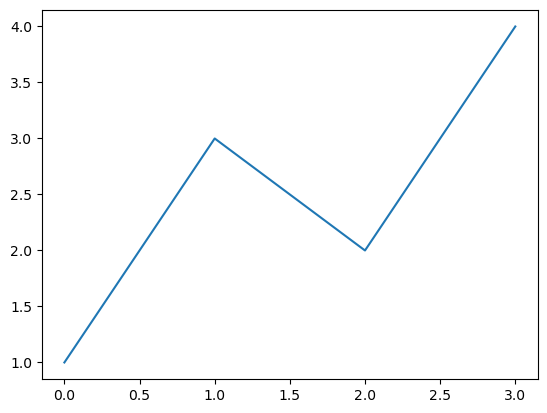

In [88]:
plt.plot([1, 3, 2, 4])

plt.show()

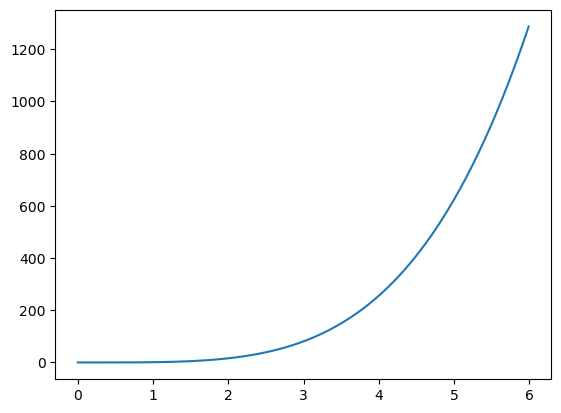

In [91]:
x3 = np.arange(0.0 , 6.0 , 0.01)

plt.plot(x3 , [xi**4 for xi in x3])
plt.show()

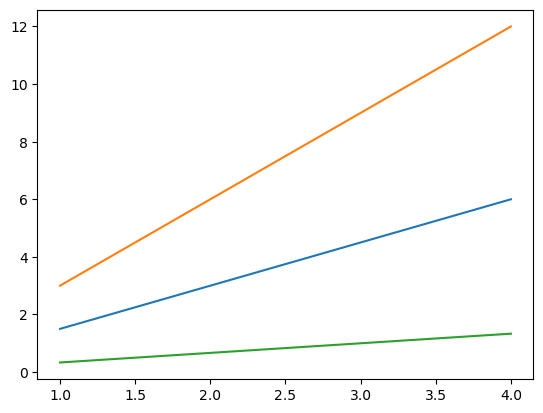

In [92]:
x4 = range(1, 5)

plt.plot(x4, [xi*1.5 for xi in x4])

plt.plot(x4, [xi*3 for xi in x4])

plt.plot(x4, [xi/3.0 for xi in x4])

plt.show()

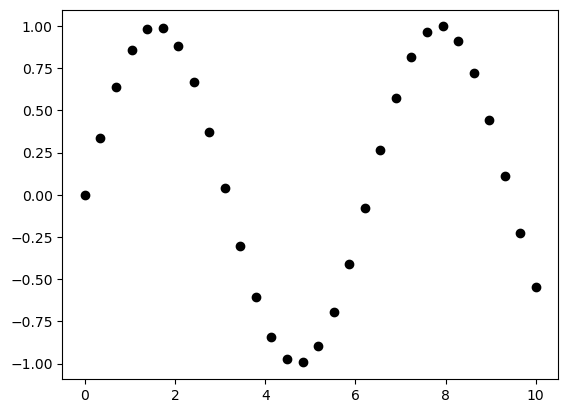

In [99]:
x7 = np.linspace(0, 10, 30)

y7 = np.sin(x7)

plt.plot(x7, y7, 'o', color = 'black');

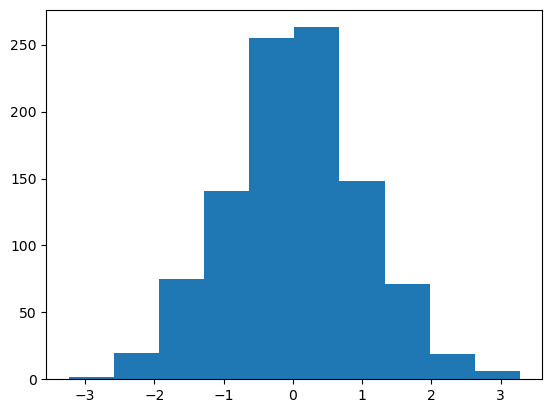

In [109]:
data1 = np.random.randn(1000)

plt.hist(data1)
plt.show()

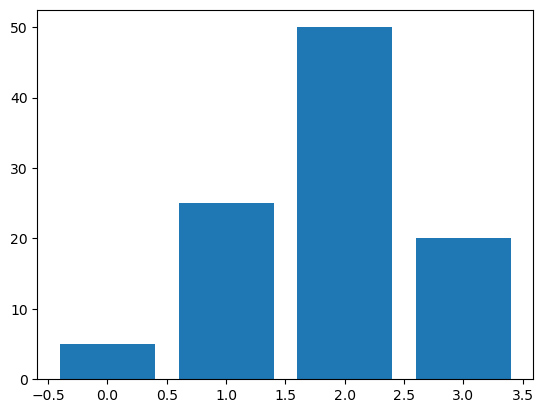

In [110]:
data2 = [5. , 25. , 50. , 20.]

plt.bar(range(len(data2)), data2)

plt.show()

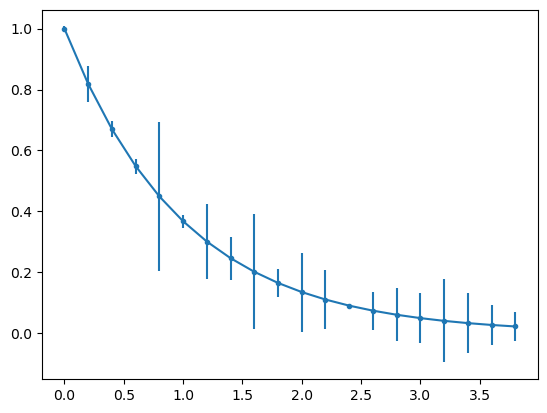

In [111]:
x9 = np.arange(0, 4, 0.2)

y9 = np.exp(-x9)

e1 = 0.1 * np.abs(np.random.randn(len(y9)))

plt.errorbar(x9, y9, yerr = e1, fmt = '.-')

plt.show();

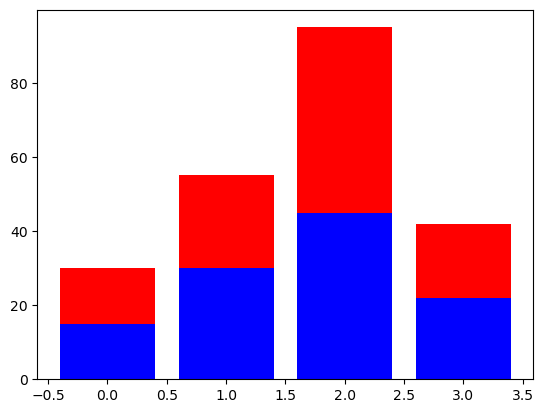

In [115]:
A = [15., 30., 45., 22.]

B = [15., 25., 50., 20.]

z2 = range(4)

plt.bar(z2, A, color = 'b')
plt.bar(z2, B, color = 'r', bottom = A)

plt.show()

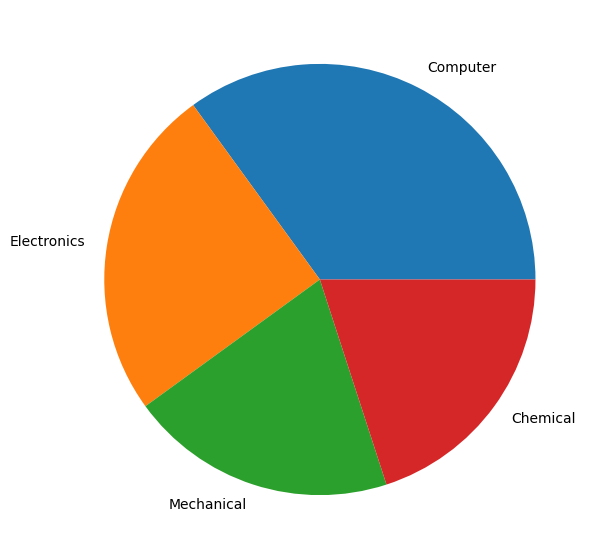

In [116]:
plt.figure(figsize=(7,7))

x10 = [35, 25, 20, 20]

labels = ['Computer', 'Electronics', 'Mechanical', 'Chemical']

plt.pie(x10, labels=labels);

plt.show()